In [1]:
#Email Spam Detection
#importing necessary modules for email spam
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#Loading DataSet
email_data=pd.read_csv("C:\\Users\\anilk\\Python Jupyter NoteBook\\spam.csv")
email_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
email_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
email_data.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [5]:
#Finding rows and columns
email_data.shape

(5572, 2)

In [6]:
email_data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
email_data.isnull().sum()

Category    0
Message     0
dtype: int64

email_data.isunique()

In [8]:
email_data.columns.nunique()

2

In [9]:
email_data.columns

Index(['Category', 'Message'], dtype='object')

In [10]:
#Graphical Representation Of Email data set
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
email_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
email_data.shape

(5572, 2)

In [13]:
email_data.value_counts('Category')

Category
ham     4825
spam     747
Name: count, dtype: int64

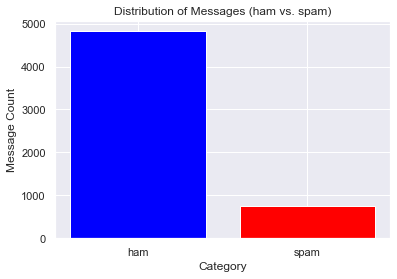

In [14]:
categories = ["ham", "spam"]
message_counts = [4825, 747]  # Replace with the actual counts from your dataset

# Create a bar chart
plt.bar(categories, message_counts, color=['blue', 'red'])
plt.xlabel("Category")
plt.ylabel("Message Count")
plt.title("Distribution of Messages (ham vs. spam)")
plt.show()

In [15]:
# Email Spam Detection Model

In [16]:
email_data.loc[email_data['Category'] == 'spam', 'Category',]=0
email_data.loc[email_data['Category'] == 'ham', 'Category',]=1

In [17]:
x=email_data["Message"]
y=email_data["Category"]

In [18]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

In [19]:
x_tfidf = tfidf_vectorizer.fit_transform(x)

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
label_encoder = LabelEncoder()

In [24]:
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [25]:
#Splitting the data into training data & test data
x_train,x_test,y_train,y_test=train_test_split(x_tfidf,y,test_size=0.2,random_state=3)
# Initialize and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train,y_train_encoded)

MultinomialNB()

In [26]:
y_pred_encoded = nb_classifier.predict(x_test)

In [27]:
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
report = classification_report(y_test_encoded, y_pred_encoded)

In [28]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.9802690582959641


In [29]:
print(report)

              precision    recall  f1-score   support

           0       1.00      0.86      0.92       155
           1       0.98      1.00      0.99       960

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [30]:
#testing above for new data

In [31]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]
new_data= tfidf_vectorizer.transform(input_mail)#processing new data
predicted_label = nb_classifier.predict(new_data)                 #prediction using Naive Bayes Model 
predicted = label_encoder.inverse_transform(predicted_label)

In [32]:
print("Predicted Value:", predicted[0])

Predicted Value: 1


In [33]:
if (predicted[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

Ham mail
